# Przygotowanie danych

In [1]:
import numpy as np
import pandas as pd
#https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset
std = pd.read_csv("student_lifestyle_dataset.csv", index_col=0)
std.dropna()
#Zamienilem Low -> 1, Moderate -> 2, High -> 3 dla latwiejszego operowania na danych
std['Stress_Level'] = std['Stress_Level'].apply(lambda x: 1 if x == 'Low' else 2 if x == 'Moderate' else 3)
#std.to_csv("StudentsAfterDataTransformation.csv")

# Wstępna analiza danych

In [2]:
print("Maximum dla kolumn\n", std.max())
print("-" * 30)
print("Minimum dla kolumn\n", std.min())
print("-" * 30)
print("Srednia dla kolumn\n", std.mean())

Maximum dla kolumn
 Study_Hours_Per_Day                10.0
Extracurricular_Hours_Per_Day       4.0
Sleep_Hours_Per_Day                10.0
Social_Hours_Per_Day                6.0
Physical_Activity_Hours_Per_Day    13.0
GPA                                 4.0
Stress_Level                        3.0
dtype: float64
------------------------------
Minimum dla kolumn
 Study_Hours_Per_Day                5.00
Extracurricular_Hours_Per_Day      0.00
Sleep_Hours_Per_Day                5.00
Social_Hours_Per_Day               0.00
Physical_Activity_Hours_Per_Day    0.00
GPA                                2.24
Stress_Level                       1.00
dtype: float64
------------------------------
Srednia dla kolumn
 Study_Hours_Per_Day                7.47580
Extracurricular_Hours_Per_Day      1.99010
Sleep_Hours_Per_Day                7.50125
Social_Hours_Per_Day               2.70455
Physical_Activity_Hours_Per_Day    4.32830
GPA                                3.11596
Stress_Level                  

### Histogramy kolumn

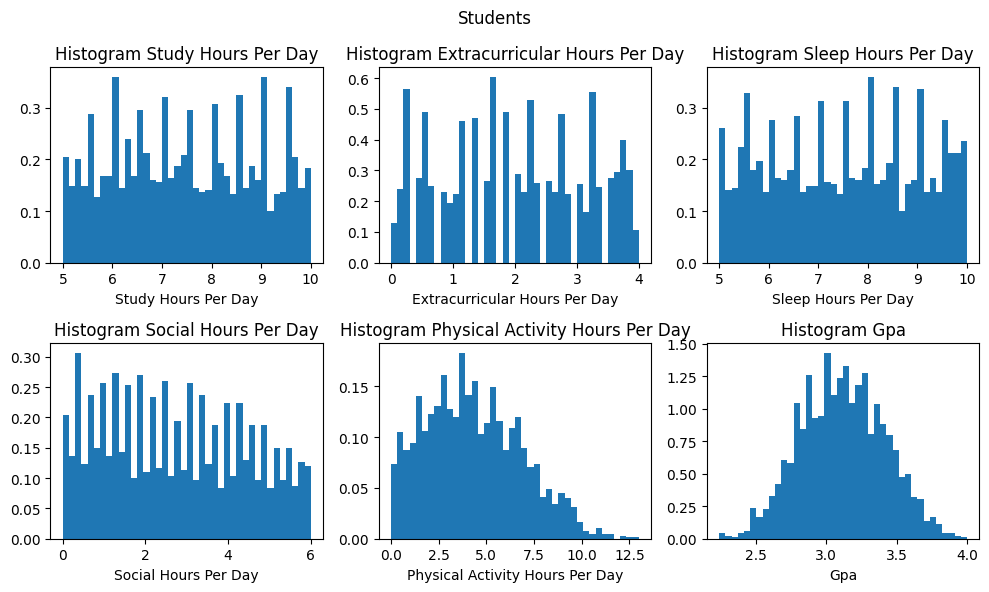

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for column, ax in zip(std.columns, axes.ravel()):
    ax.hist(std[column], bins=40, density=True)
    ax.set_title(f"Histogram {column.replace("_", " ").title()}")
    ax.set_xlabel(column.replace("_", " ").title())

fig.suptitle("Students")
fig.tight_layout() 

### Histogram aktywności fizycznej

Text(0.5, 0, 'Physical Activity Hours Per Day')

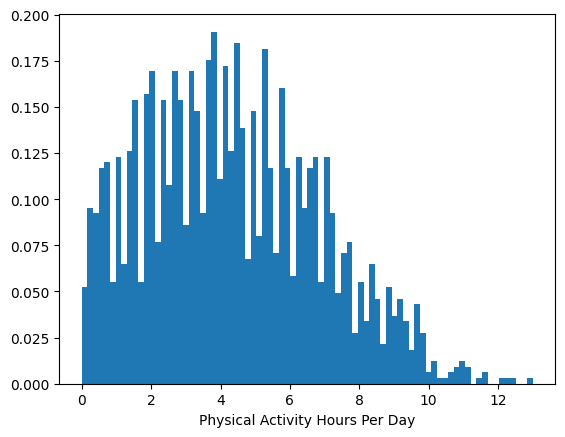

In [4]:
# Histogramu aktywności fizycznej dla większej dokładności 
plt.hist(std["Physical_Activity_Hours_Per_Day"], bins=80, density=True)
plt.xlabel("Physical Activity Hours Per Day")

In [5]:
# Podejrzana jest wartość 13 godzin aktywności fizyczenej dlatego zrobiłem sumowanie godzin studentów aby 
# sprawdzić czy suma godzin nie przekracza 24 godzin. Nie znalazło takiej wartości dlatego zostawiam te dane.
std[["Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]].sum(axis=1).round(2).value_counts()

24.0    2000
Name: count, dtype: int64

### Zależności między zmiennymi

Text(0.5, 1.0, 'Correlation Matrix')

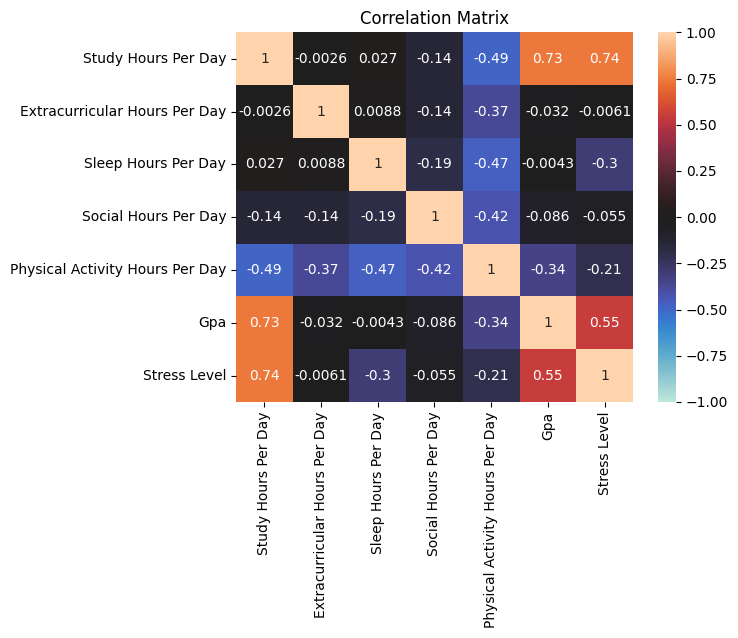

In [6]:
tick_labels = std.columns.str.replace("_", " ").str.title()
sns.heatmap(data=std.corr(numeric_only=True), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            center=0, 
            xticklabels=tick_labels, 
            yticklabels=tick_labels)
plt.title("Correlation Matrix")

### Szukanie zależności między zmiennymi z uwzględnieniem poziomu stresu

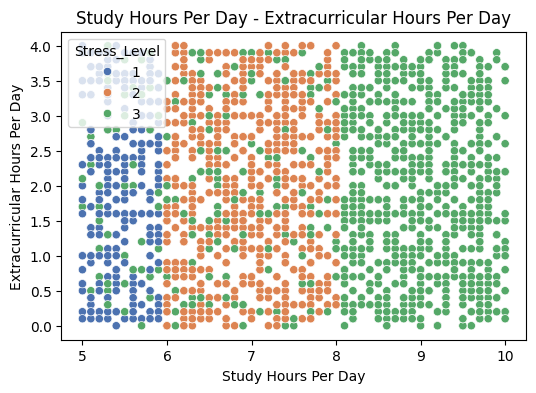

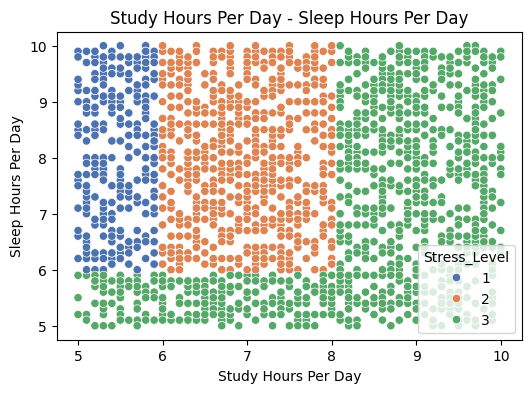

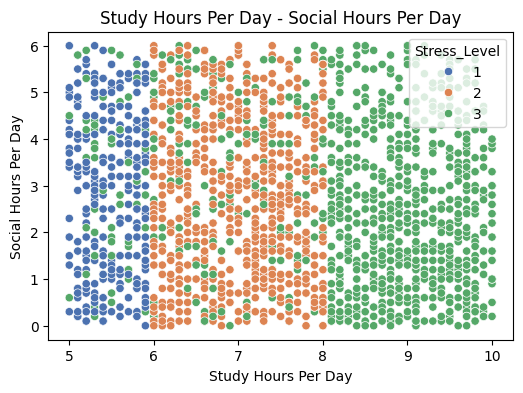

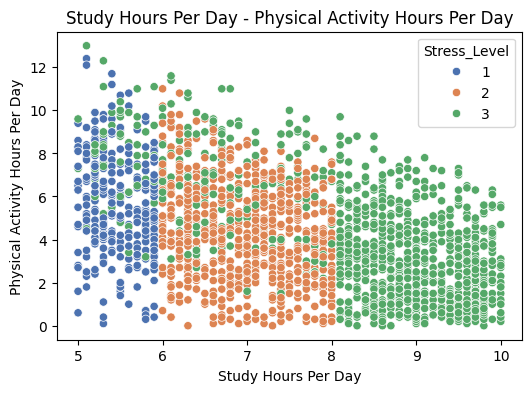

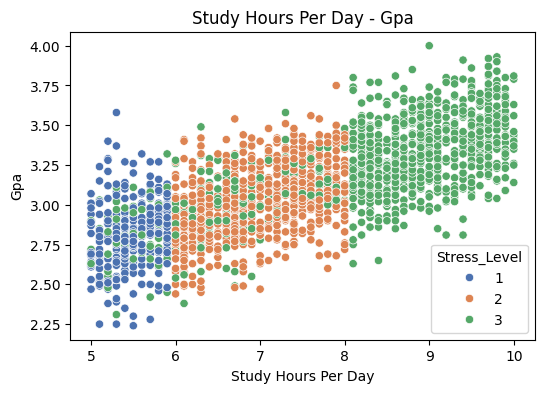

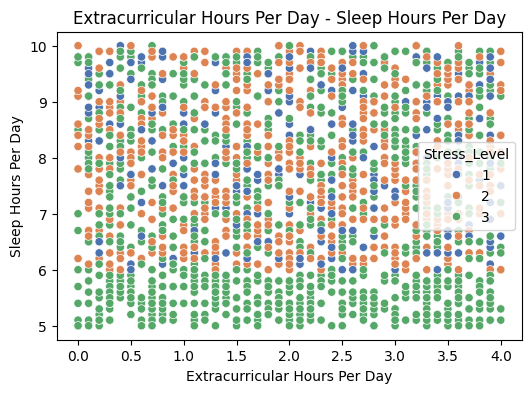

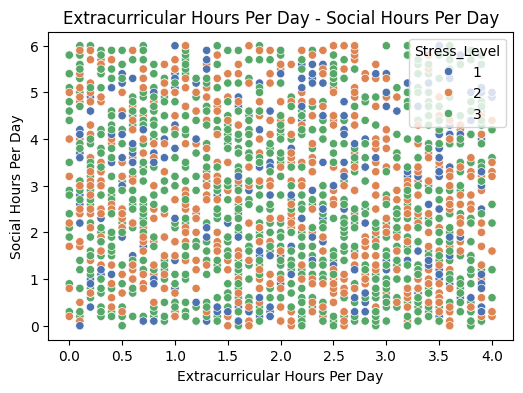

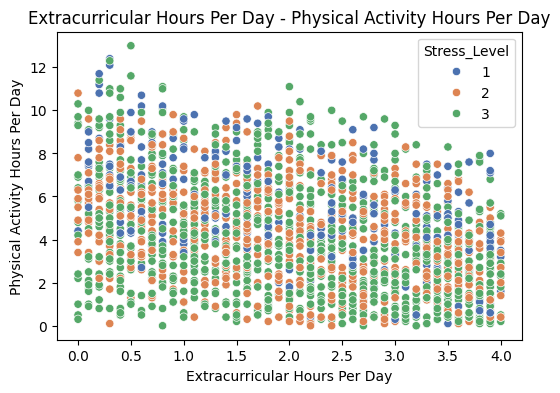

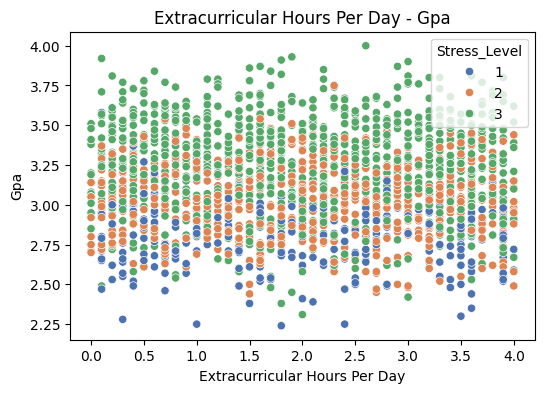

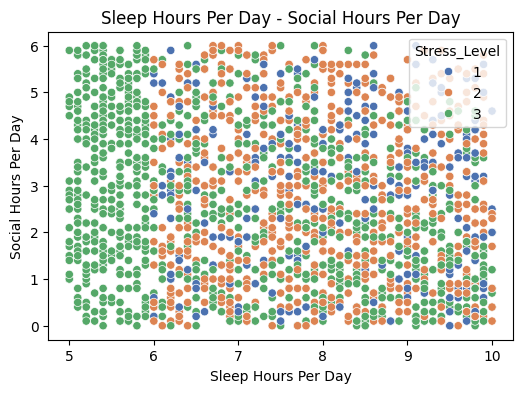

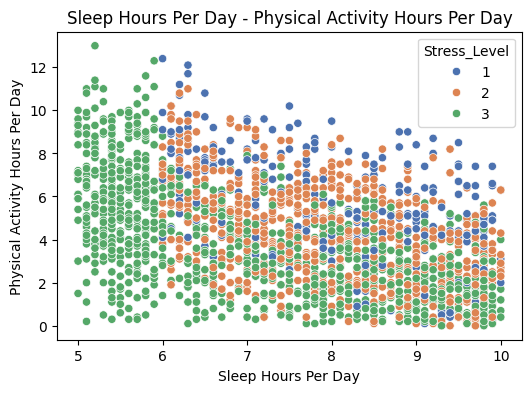

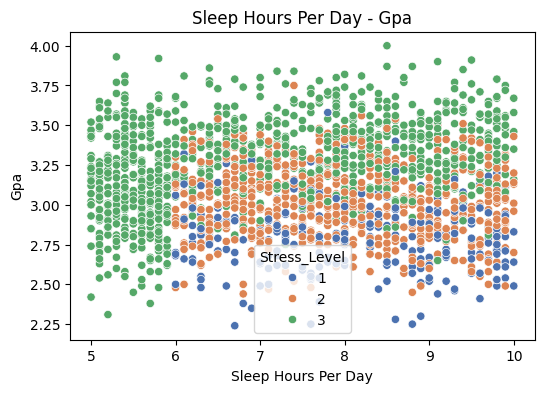

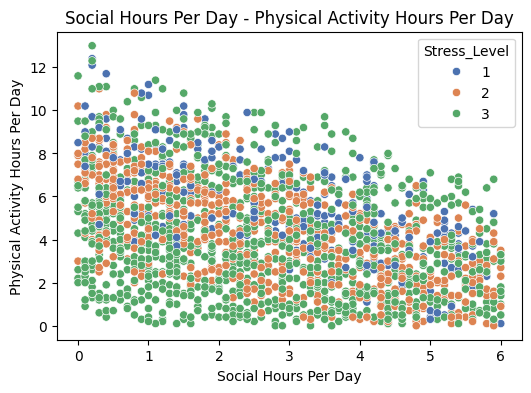

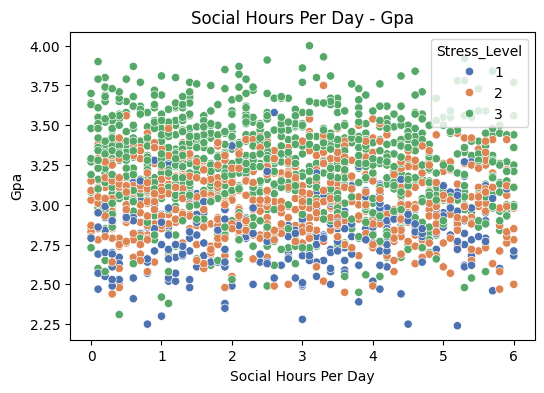

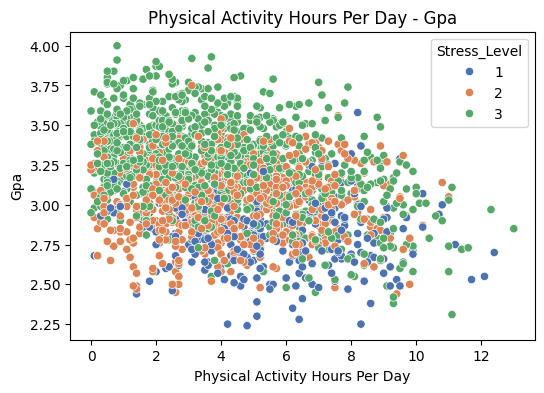

In [7]:
columns = std.drop(columns="Stress_Level").columns
for i, column_x in enumerate(columns):
    for j, column_y in enumerate(columns):
        if i < j:  # Aby uniknąć duplikatów i wykresów tej samej zmiennej
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=column_x, y=column_y, hue="Stress_Level", data=std, palette="deep")
            plt.xlabel(column_x.replace("_", " ").title())
            plt.ylabel(column_y.replace("_", " ").title())
            plt.title(f'{column_x.replace("_", " ").title()} - {column_y.replace("_", " ").title()}')
            plt.show()

Text(0, 0.5, 'Sleep Hours Per Day')

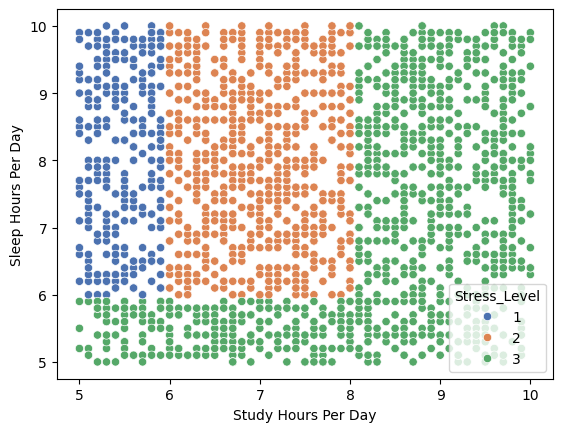

In [8]:
sns.scatterplot(x="Study_Hours_Per_Day", y="Sleep_Hours_Per_Day", hue="Stress_Level", data=std, palette="deep")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Sleep Hours Per Day")
#Znaleziona zależność jest ciekawym przypadkiem ponieważ dobrze sortuje dane. Duży potencjał na drzewo decyzyjne

# Regresja Liniowa

### Backward Selection

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#lm = smf.ols(formula="Stress_Level ~ Study_Hours_Per_Day + Extracurricular_Hours_Per_Day + Sleep_Hours_Per_Day + Social_Hours_Per_Day + Physical_Activity_Hours_Per_Day + GPA", data=std)
## Wyrzucam GPA - pvalue = 0.984
lm = smf.ols(formula="Stress_Level ~ Study_Hours_Per_Day + Extracurricular_Hours_Per_Day + Sleep_Hours_Per_Day + Social_Hours_Per_Day + Physical_Activity_Hours_Per_Day", data=std)
## Największe pvalue - 0.001 
lm_bs = lm.fit()
lm_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stress_Level   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     917.0
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:45:23   Log-Likelihood:                -1157.9
No. Observations:                2000   AIC:                             2326.
Df Residuals:                    1995   BIC:                             2354.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0151      0.000     47.389      0.000       0.015       0.016
Study_Hours_Per_Day                 0.4111      0.005     78.266      0.000       0.401       0.421
Extracurricular_Hours_Per_Day       0.0282      0.008      3.425      0.001       0.012       0.044
Sleep_Hours_Per_Day                -0.1299      0.005    -25.245      0.000      -0.140      -0.120
Social_Hours_Per_Day                0.0239      0.005      4.433      0.000       0.013       0.035
Physical_Activity_Hours_Per_Day     0.0303      0.003      9.015      0.000       0.024       0.037
==============================================================================
Omnibus:                       45.580   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.319
Skew:                           0.378   Prob(JB):                     3.22e-11
Kurtosis:                       2.902   Cond. No.                     1.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Forward Selection

In [10]:
#Wyliczanie RSS
predictors = list(std.columns)
predictors.remove("Stress_Level")
for predictor in predictors:
    formula = f"Stress_Level ~ {predictor}"
    model = smf.ols(formula=formula, data=std).fit()
    rss = ((std["Stress_Level"] - model.predict())**2).sum()
    print(f"RSS dla {predictor}: {rss:.4f}")

RSS dla Study_Hours_Per_Day: 480.4891
RSS dla Extracurricular_Hours_Per_Day: 1058.0486
RSS dla Sleep_Hours_Per_Day: 963.5466
RSS dla Social_Hours_Per_Day: 1054.9219
RSS dla Physical_Activity_Hours_Per_Day: 1013.5320
RSS dla GPA: 737.5568


In [11]:
#Po dodaniu Study_Hours_Per_Day, GPA oraz Sleep_Hours_Per_Day R-squared jest już takie same zatem nie dodaje już więcej
#Po dodaniu Sleep_Hours_Per_Day GPA ma pvalue -0.990 zatem usuwam
#R-squared pozostaje równe 0.648
lm = smf.ols(formula="Stress_Level ~ Study_Hours_Per_Day + Sleep_Hours_Per_Day", data=std)
lm_fs = lm.fit()
lm_fs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stress_Level   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1834.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:45:23   Log-Likelihood:                -1158.5
No. Observations:                2000   AIC:                             2323.
Df Residuals:                    1997   BIC:                             2340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7025      0.071      9.933      0.000       0.564       0.841
Study_Hours_Per_Day     0.3819      0.007     56.233      0.000       0.369       0.395
Sleep_Hours_Per_Day    -0.1588      0.007    -23.993      0.000      -0.172      -0.146
==============================================================================
Omnibus:                       46.651   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.532
Skew:                           0.382   Prob(JB):                     1.75e-11
Kurtosis:                       2.903   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Drzewo decyzyjne

### Przygotowanie danych do treningu

In [12]:
from sklearn.model_selection import train_test_split

X = std.drop(columns="Stress_Level")
y = std.Stress_Level

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Znalezienie najlepszego drzewa poprzez walidację krzyżową

In [13]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

# Najlepszy model i jego ocena
best_tree = grid_search.best_estimator_
print("Najlepsze parametry:", grid_search.best_params_)
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='accuracy')
print("Dokładność walidacji krzyżowej:", cv_scores.mean())

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Dokładność walidacji krzyżowej: 1.0


### Najlepsze drzewo

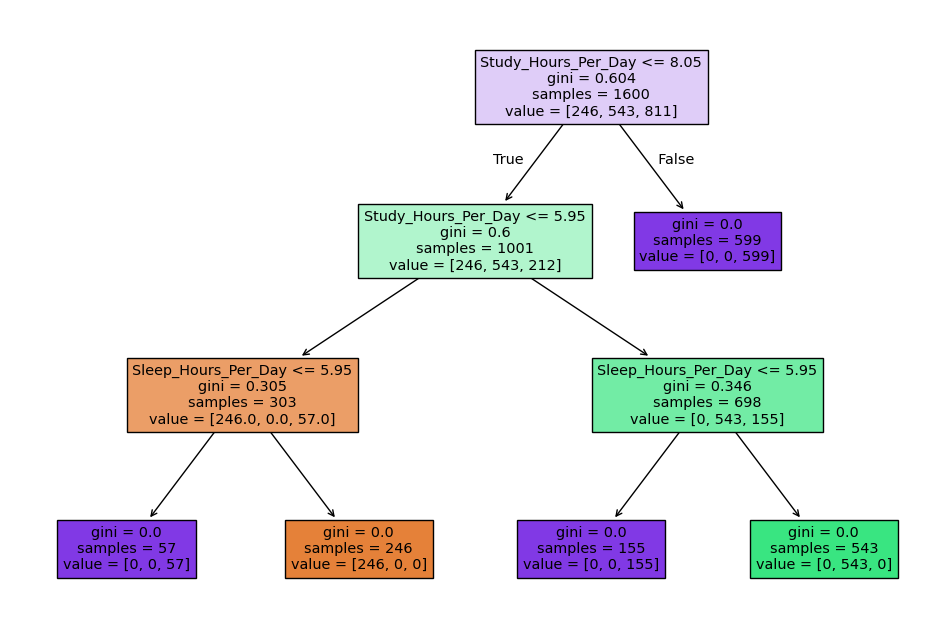

In [14]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=std.columns[:-1], filled=True)
plt.show()

### Wykres dokładności drzewa ze względu na głębokość

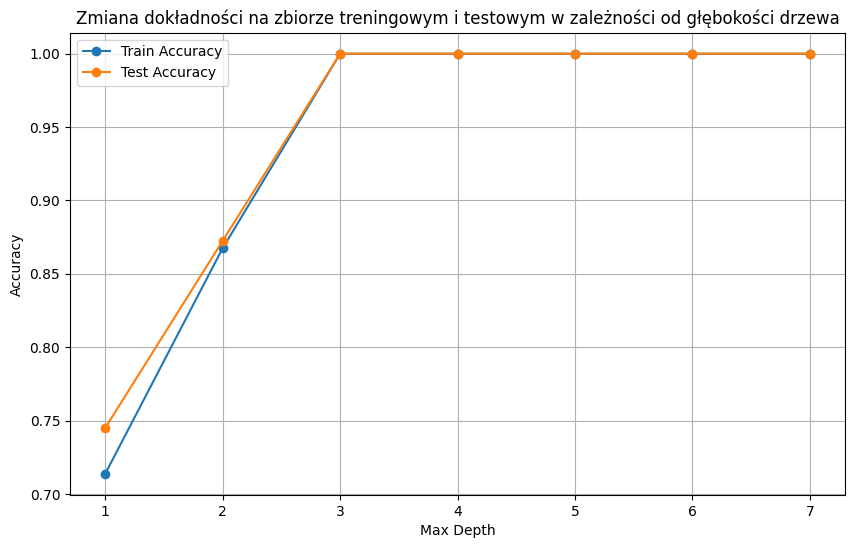

In [15]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = [1, 2, 3, 4, 5, 6, 7, 8]
#depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_accuracies = []
test_accuracies = []

# Trening modelu dla różnych wartości max_depth
for depth in depths:
    # Tworzenie i trenowanie modelu drzewa decyzyjnego
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    # Obliczanie dokładności na zbiorze treningowym i testowym
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    # Dodawanie wyników do list
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(depths[:-1], train_accuracies[:-1], label='Train Accuracy', marker='o')
plt.plot(depths[:-1], test_accuracies[:-1], label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Zmiana dokładności na zbiorze treningowym i testowym w zależności od głębokości drzewa')
plt.legend()
plt.grid()
plt.show()

### Wygląd drzewa na wykresie

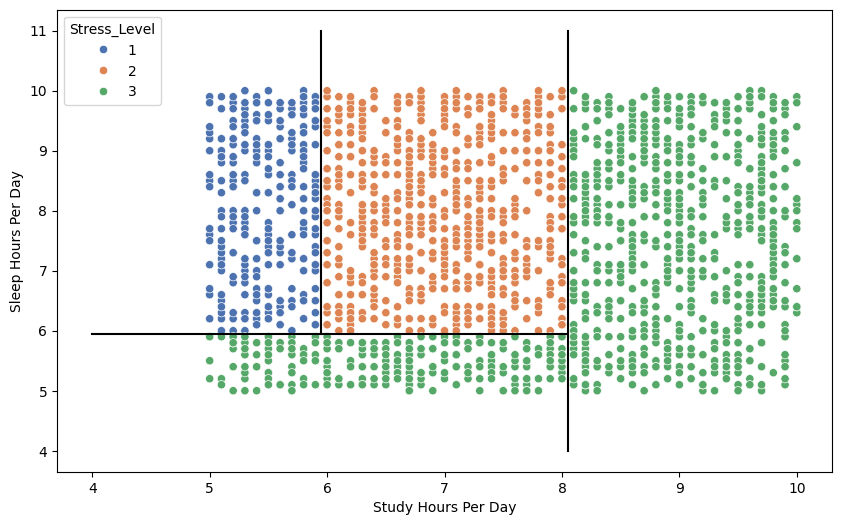

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Drzewo do narysowania
X_draw = std[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day"]]
y_draw = std["Stress_Level"]
tree_draw = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_draw.fit(X_draw, y_draw)

# Zbieranie Linii podziału
def plot_decision_tree_splits(tree_draw, X_draw, ax):
    tree_ = tree_draw.tree_
    feature_names = X_draw.columns
    # Rekurencyjne rysowanie podziałów
    def recurse(node, x_min, x_max, y_min, y_max):
        # Oś X - Study_Hours_Per_Day
        if tree_.feature[node] == 0:
            split = tree_.threshold[node]
            ax.plot([split, split], [y_min, y_max], 'k-')
            recurse(tree_.children_left[node], x_min, split, y_min, y_max)
            recurse(tree_.children_right[node], split, x_max, y_min, y_max)
        # Oś Y - Sleep_Hours_Per_Day
        elif tree_.feature[node] == 1:  
            split = tree_.threshold[node]
            ax.plot([x_min, x_max], [split, split], 'k-')
            recurse(tree_.children_left[node], x_min, x_max, y_min, split)
            recurse(tree_.children_right[node], x_min, x_max, split, y_max)

    recurse(0, X_draw.iloc[:, 0].min() - 1, X_draw.iloc[:, 0].max() + 1, 
               X_draw.iloc[:, 1].min() - 1, X_draw.iloc[:, 1].max() + 1)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="Study_Hours_Per_Day", y="Sleep_Hours_Per_Day", hue="Stress_Level", data=std, palette="deep", ax=ax)
plt.xlabel("Study Hours Per Day")
plt.ylabel("Sleep Hours Per Day")
plot_decision_tree_splits(tree_draw, X_draw, ax)
plt.show()


# Porównanie modeli

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Metryki dla modelu {model_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  R^2:  {r2:.4f}")
    print("-" * 30)

y_pred_lm_bs = lm_bs.predict(X_test)
y_pred_lm_fs = lm_fs.predict(X_test)
y_pred_tree = tree.predict(X_test)

evaluate_model(y_test, y_pred_lm_bs, "Regresja liniowa - Backward Selection")
evaluate_model(y_test, y_pred_lm_fs, "Regresja liniowa - Forward Selection")
evaluate_model(y_test, y_pred_tree, "Drzewo decyzyjne")

Metryki dla modelu Regresja liniowa - Backward Selection:
  MSE:  0.1740
  R^2:  0.6508
------------------------------
Metryki dla modelu Regresja liniowa - Forward Selection:
  MSE:  0.1741
  R^2:  0.6505
------------------------------
Metryki dla modelu Drzewo decyzyjne:
  MSE:  0.0000
  R^2:  1.0000
------------------------------
